<a href="https://colab.research.google.com/github/vigaor/Tormentas/blob/main/Google_Datos_pluvi%C3%B3metros_Estaci%C3%B3n_UCSC_San_Andr%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estación  UCSC San Andrés**



# Descarga y recopilación de datos en archivos excel

**Para la ejecucion de la descarga de datos, a través de un programa determinado, es necesario capacitar al personal para un correcto uso.**

**Los archivos deben ser descargados en formato .xlsx, el cual corresponde al formato de excel.**












**Los archivos en formato excel deben ser ordenados de la siguiente manera:**


1. La primera columna debe contener las fechas y horas de medición.
2. La segunda columna debe contener los registros de la precipitación. 


## **1. Formato de fecha y hora de medición**
 
 

*   En excel el formato de texto debe ser personalizado, es decir, debe agregarse de la siguiente manera: mm/dd/aa hh:mm:ss. 

**En la siguiente figura, se muestra un ejemplo sobre como debe ser el orden de los registros.**








<center><img src="https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/formatofechahora.png" alt="Fecha y Hora" width="300"></center>





## **2.   Precipitación (Registros de cada click)** 




El sistema de marcación del pluviómetro marca un click cada 0.2 mm de agua precipitada, luego, en caso que vuelva a precipitar esa misma cantidad el sistema vuleve a marcar otro click y asi sucesivamente.

El archivo excel, que contiene los datos, mostrará solo los clicks registrados. El usuario/a debe generar el intercambio según cada click a 0.2 mm.

**A continuación se presenta un ejemplo de la forma en la cual se debe desarrollar el proceso.**



<center><img src="https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/jeje.png" alt="Cambio de click a precipitación" width="800"></center>


Luego de evidenciar cada click, se debe asignar el valor 0.2 a cada uno, en el caso donde no haya resgitro de ellos, es decir, cuando la celda este vacía se debe asignar el valor 0.

**A continuación, se presenta la formula, que aparece destacada en la planilla, la cual se debe insertar para realizar el proceso mencionado anteriormente.** 

<center><img src="https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/uhuhh.png" alt="Cambio de click a precipitación" width="900"></center>



**Luego la columna completa se copia y pega donde se está dejando el registro de la fecha y hora. Por lo tanto, como resultado se debe obtener la tabla que se muestra a continuación.**

## El archivo final debe ser guardado con el siguiente nombre **"Datos Red Pluviometros".**

<center><img src="https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/Formatofechahora_precipitacion.png" alt="Cambio de click a precipitación" width="600"></center>




#**Post proceso de datos**



1.  **En primer lugar, Se muestra la precipitación acumulada mensual para la Estación UCSC San Andrés**
2.   **Luego se muestra la precipitación acumulada diaria durante los meses de registro en la Estación UCSC San Andrés**




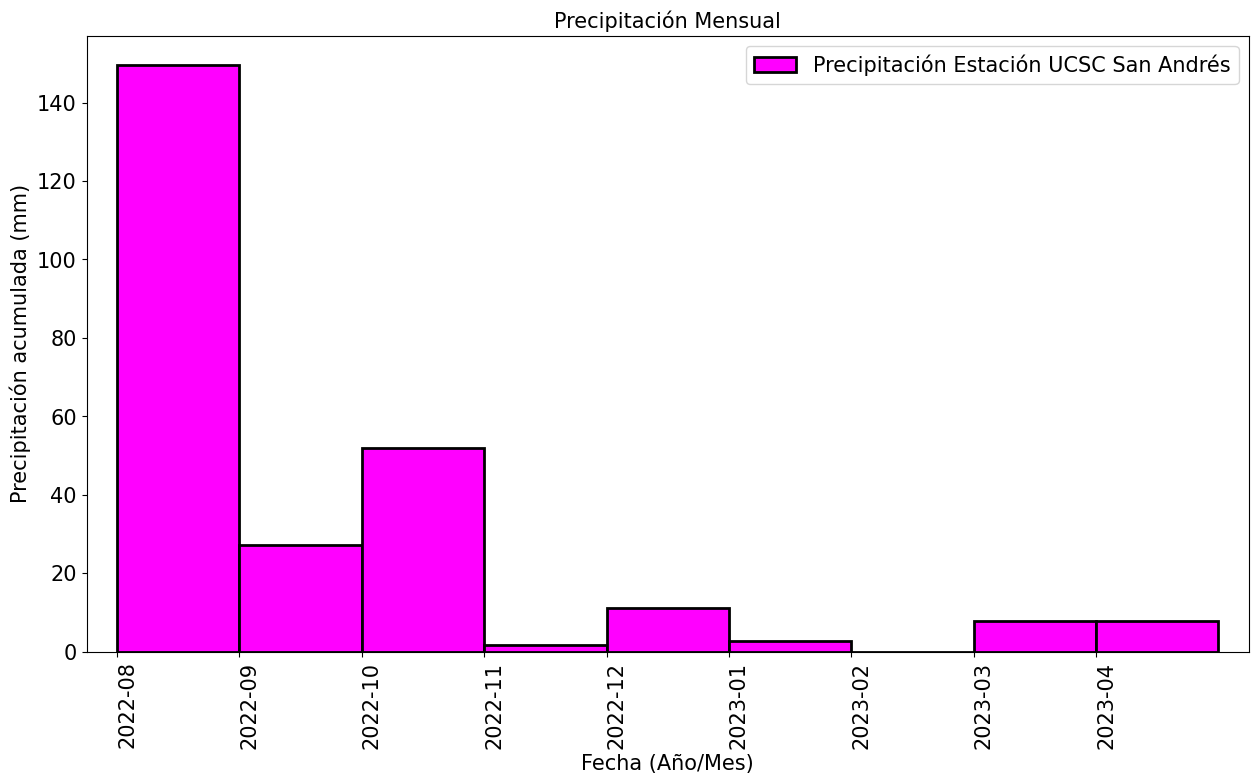

In [6]:
#@title **Precipitación Acumulada Mensual (mm)**
#lee los datos con pandas para la sheet_name de excel indicado
import pandas as pd
import datetime
import numpy as np


df_nucleo= pd.read_excel('https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/Codigos%20y%20archivos/Deteccion%20de%20tormentas/Datos%20Red%20Pluviometros.xlsx',sheet_name='UCSC')
df_nucleo
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum(numeric_only=True)

#Se considera como un vector los indices de la precipitacion, los cuales son las fechas
precipitacion = df_g
dt_fechas = df_g.index
dias = np.array([dt_fecha.day for dt_fecha in dt_fechas])

#Crea un vector de zeros del largo de los dias que hay en dt_fechas, es donde
#se guardaran las sumas de la precipitacion por dia
precip_dia = np.zeros(len(dias))

#Busca el indice donde el vector dia cambia de dia
cambios_de_dia = np.where(np.roll(dias, 1) != dias)[0]
fech = []
precipi = []

# Sumar la precipitación correspondiente a cada día
for i in range(len(cambios_de_dia)):
    if i == len(cambios_de_dia) - 1: # si es igual al ultimo dia
        precip_dia[cambios_de_dia[i]:] = np.sum(precipitacion[cambios_de_dia[i]:])
    else: # si es distinto al ultimo dia
        #Aqui se realiza la suma de la precipitacion desde el cambio de dia i hasta el i+1 sin tomar en cuanta el i+1
        precip_dia[cambios_de_dia[i]:cambios_de_dia[i+1]] = np.sum(precipitacion[cambios_de_dia[i]:cambios_de_dia[i+1]])
    
    
    # Agregar fecha y precipitación a las listas correspondientes, GUARDA LOS VECTORES PARA TRABAJARLOS LUEGO
    fechitas = dt_fechas[cambios_de_dia[i]].date().strftime('%m-%d-%Y')
    precipp = precip_dia[cambios_de_dia[i]]
    fech.append(fechitas)
    precipi.append(precipp)

# Imprimir la precipitación correspondiente a cada día
#for i in range(len(cambios_de_dia)):
    #print("El día", dt_fechas[cambios_de_dia[i]].date(), "se ha registrado una precipitación de", precip_dia[cambios_de_dia[i]]


#Aqui se genera la precipitacion acumulada mensual 
precipitacion = df_g #datos (precipitacion)
fechas = df_g.index #indice (fechas)

# crea una columna con el año y el mes correspondiente a cada fecha
mesaño = pd.DataFrame({'anio_mes': [dt_fecha.strftime('%Y-%m') for dt_fecha in fechas]}, index=fechas)

# usa la columna de año y mes como índice para agrupar y sumar la precipitación por mes
precip_mensual = precipitacion.groupby(mesaño['anio_mes']).sum()

import matplotlib.pyplot as plt

# crea la figura y el eje
fig, ax = plt.subplots()

# Define el tamaño de la figura
fig.set_size_inches(15, 8)


# grafica los datos en barras

precip_mensual.plot.bar(ax=ax, color='magenta', width=1, edgecolor='k',linewidth=2, align='edge',alpha = 1)
ax.set_xticklabels(precip_mensual.index, rotation=90, ha='left')

# personaliza los ejes y la leyenda
ax.legend(['Precipitación Estación UCSC San Andrés'], fontsize=15)
ax.set_xlabel('Fecha (Año/Mes)', fontsize=15)
ax.set_ylabel('Precipitación acumulada (mm)', fontsize=15)
ax.set_title('Precipitación Mensual', fontsize=15)
ax.tick_params(axis='both', labelsize=15)

La fecha con mayor preciptiación fue el 08-16-2022 con 56.2 mm de agua precipitada.


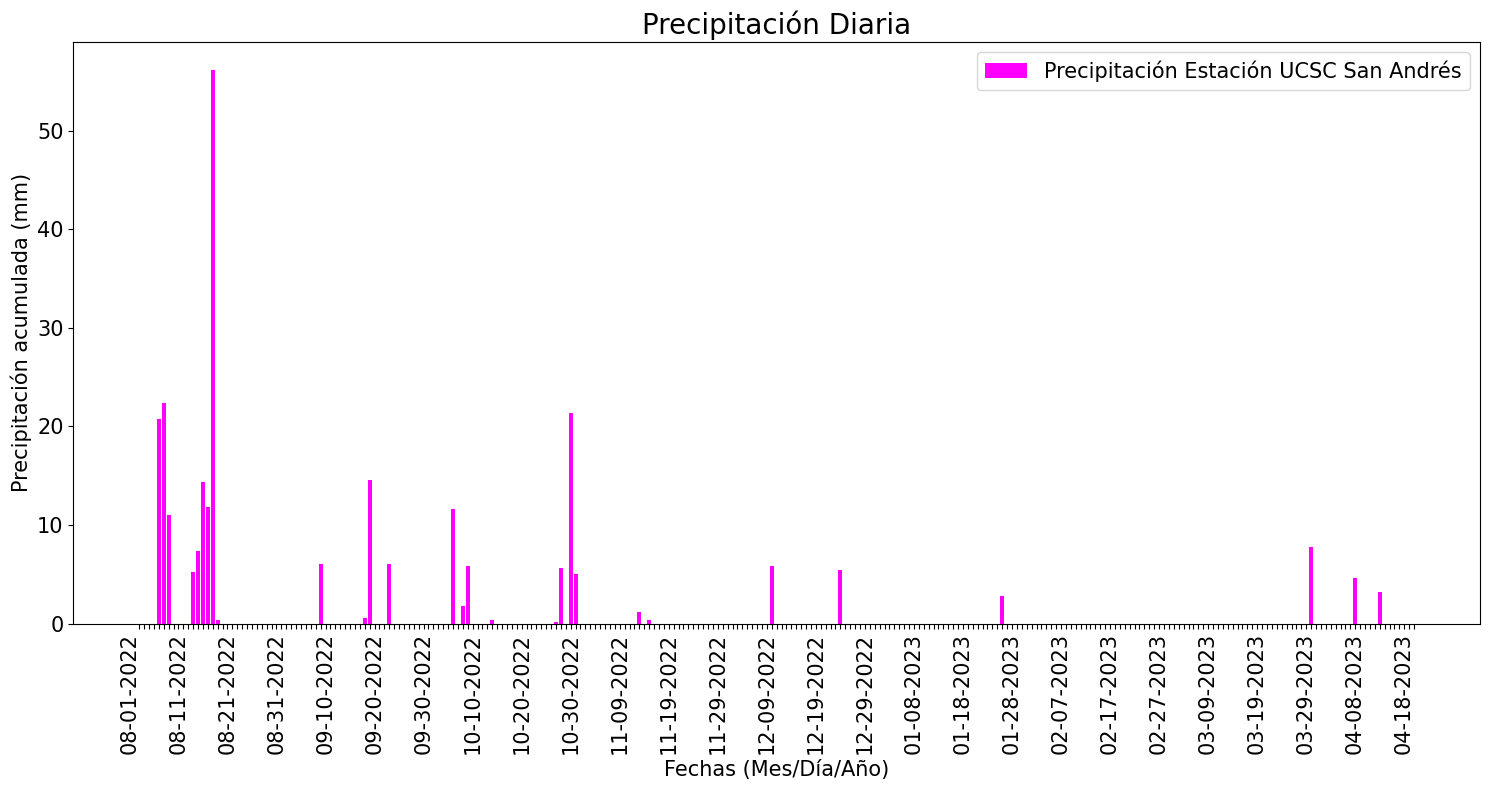

In [13]:
#@title **Precipitación Acumulada Diaria (mm)** 

# Crea la figura con el tamaño deseado
fig = plt.figure(figsize=(15, 8))

# Crea el gráfico de barras
plt.bar(range(len(precipi)), precipi, color='magenta')

# Modifica las etiquetas del eje x para mostrar solo cada 10 días
fech_10d = [fech[i] if i % 10 == 0 else "" for i in range(len(fech))]
plt.xticks(range(len(fech)), fech_10d, rotation=90, ha="right")

# Agrega etiquetas a los ejes y título al gráfico
plt.legend(['Precipitación Estación UCSC San Andrés'], fontsize=15)

plt.xlabel('Fechas (Mes/Día/Año)', fontsize = 15)


plt.ylabel('Precipitación acumulada (mm)', fontsize = 15)
plt.title('Precipitación Diaria', fontsize = 20)
plt.tick_params(axis='both', labelsize=15)
# Muestra el gráfico
plt.tight_layout()



maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',np.round(precip_dia.max(),4),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO

#**A continuación se realiza el análisis de la distribución de la precipitación en ventanas de tiempo reloj.**

**Se realiza el análisis para las 2 tormentas más grandes durante los meses de registro, siendo estas:**

**1.   6 de Agosto de 2022**

**2.   15-16 de Agosto de 2022**










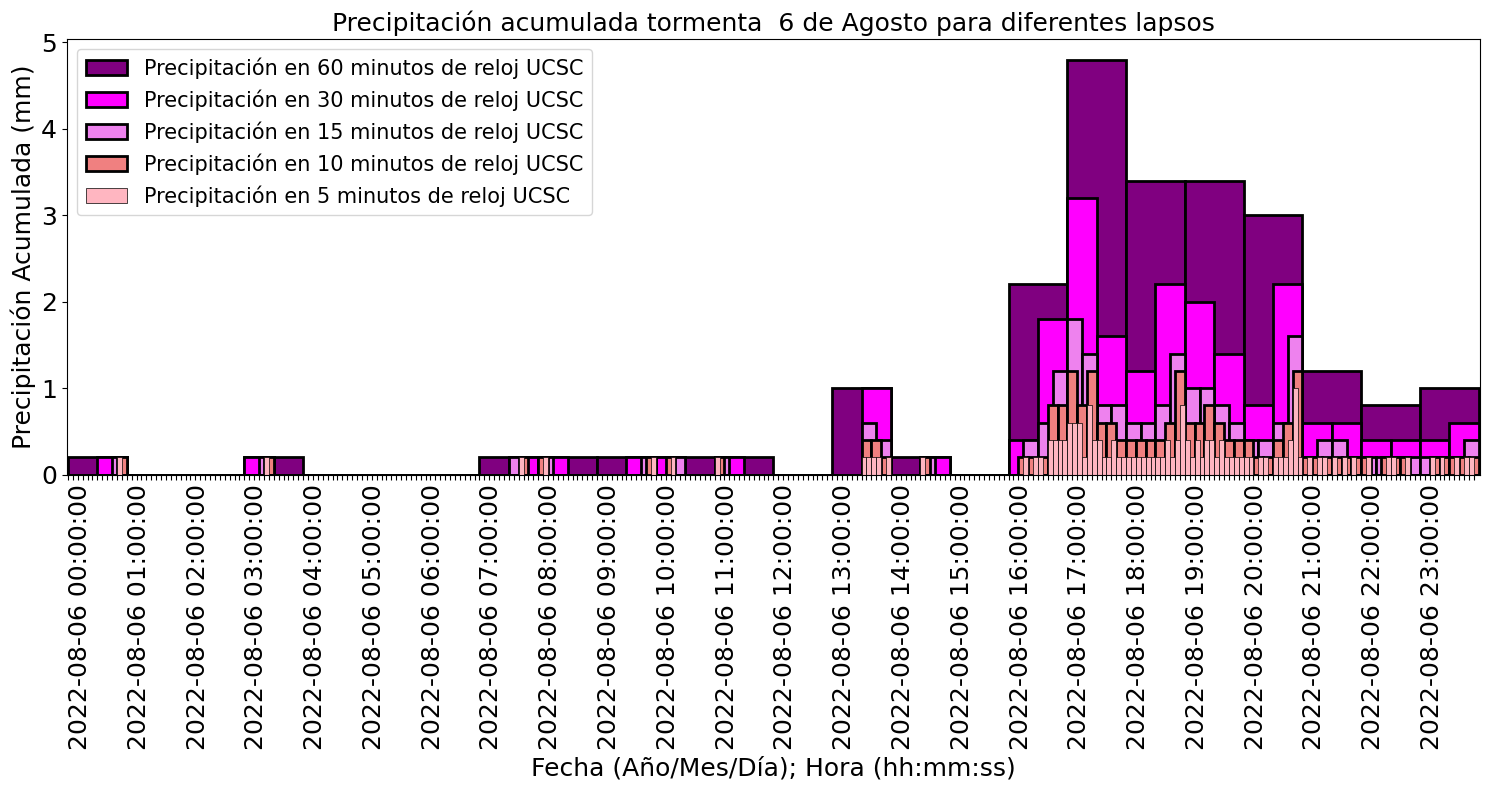

In [17]:

#@title **Precipitación Acumulada Diaria (mm) en ventana de tiempo reloj durante el 6 de Agosto de 2022.** 

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

df_nucleo= pd.read_excel('https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/Codigos%20y%20archivos/Intensidades%20Tormentas%20en%20tiempo%20de%20reloj%20en%20el%20tiempo/Datos%206%20de%20agosto%202022.xlsx',sheet_name='UCSC')
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum(numeric_only=True)
#genera filas para cada minuto del rango de datos
r = pd.date_range(start=df_g.index.min(),end=df_g.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
df_g=df_g.reindex(r).fillna(0.0)

#entrega el nuevo tamaño del archivo (filas, columnas)
#df_g.to_excel('tormento.xlsx')

# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()


#GRÁFICA
#Deja en la misma escala todos los registros
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)
# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 1)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Precipitación en 60 minutos de reloj UCSC","Precipitación en 30 minutos de reloj UCSC", "Precipitación en 15 minutos de reloj UCSC","Precipitación en 10 minutos de reloj UCSC", "Precipitación en 5 minutos de reloj UCSC"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=18)
ax.set_ylabel('Precipitación Acumulada (mm)', fontsize=18)
ax.set_title('Precipitación acumulada tormenta  6 de Agosto para diferentes lapsos', fontsize=18)

ax.tick_params(axis='both', labelsize=18)
plt.tight_layout()

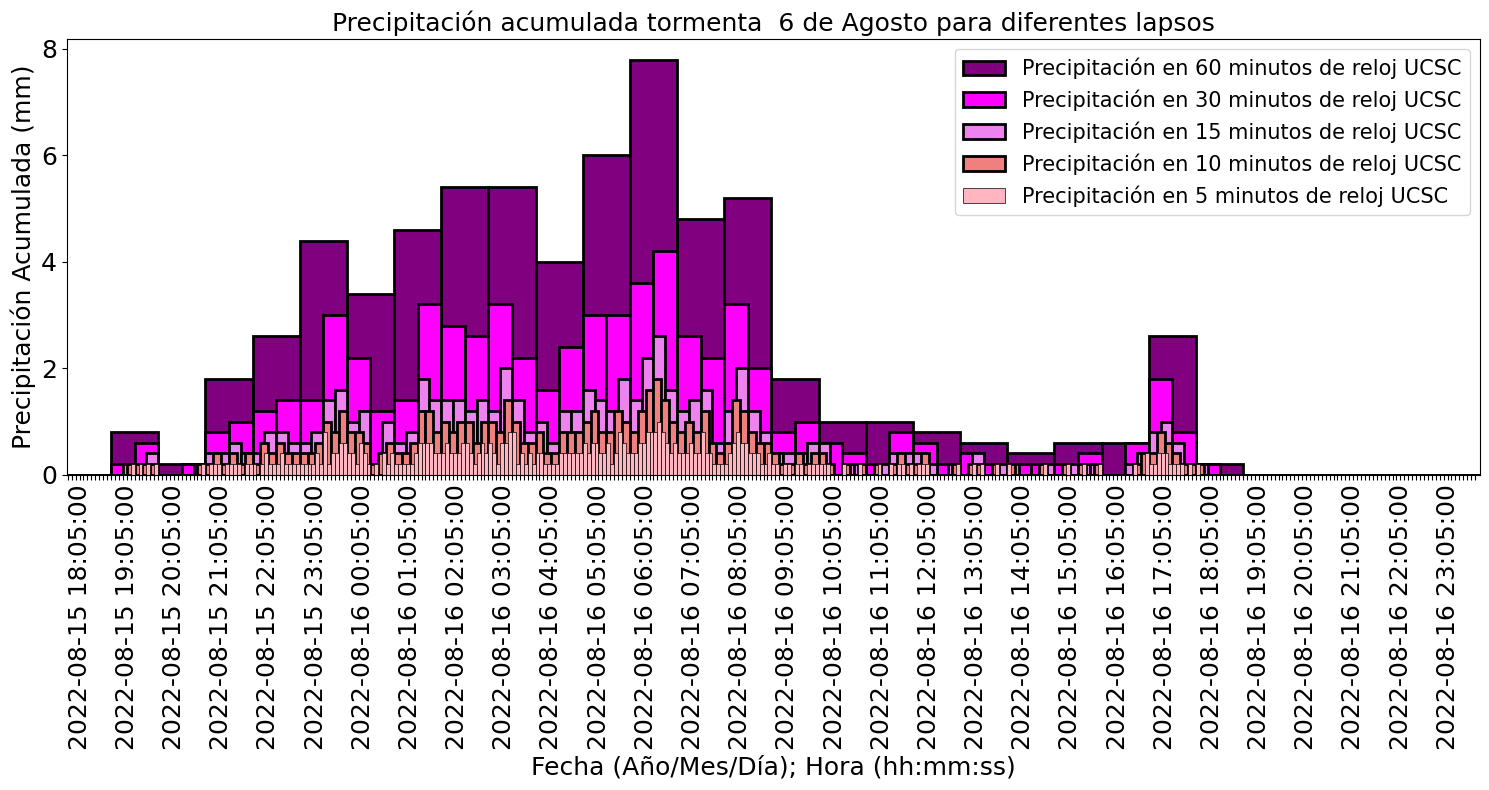

In [18]:
#@title **Precipitación Acumulada Diaria (mm) en ventana de tiempo reloj durante el 15-16 de Agosto de 2022.** 

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

df_nucleo= pd.read_excel('https://github.com/vigaor/Tormentas/raw/e54fb4c34b22ead35dae4a67572b8fc96225d39e/Codigos%20y%20archivos/Intensidades%20Tormentas%20en%20tiempo%20de%20reloj%20en%20el%20tiempo/Datos%2015-16%20de%20agosto%202022.xlsx',sheet_name='UCSC')
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum(numeric_only=True)
#genera filas para cada minuto del rango de datos
r = pd.date_range(start=df_g.index.min(),end=df_g.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
df_g=df_g.reindex(r).fillna(0.0)

#entrega el nuevo tamaño del archivo (filas, columnas)
#df_g.to_excel('tormento.xlsx')

# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()


#GRÁFICA
#Deja en la misma escala todos los registros
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)
# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 1)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Precipitación en 60 minutos de reloj UCSC","Precipitación en 30 minutos de reloj UCSC", "Precipitación en 15 minutos de reloj UCSC","Precipitación en 10 minutos de reloj UCSC", "Precipitación en 5 minutos de reloj UCSC"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=18)
ax.set_ylabel('Precipitación Acumulada (mm)', fontsize=18)
ax.set_title('Precipitación acumulada tormenta  6 de Agosto para diferentes lapsos', fontsize=18)

ax.tick_params(axis='both', labelsize=18)
plt.tight_layout()